# Insurances

This notebook is about the capital of insurances. 

I want to use pandas for data cleaning and describing and matplotlib as well as seaborn for visualisation. 

In [1]:
# Import the necessary libraries. All are part of the environment, in which the notebook lives. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [3]:
init_notebook_mode(connected=True) 

## Load and describe the data

In [4]:
# Read in the data and get first glimpse 

insurances=pd.read_csv('PT6_21072021205145247.csv')
insurances.head()

,CUR,Currency,VAR,Variable,OWN,Ownership,IVTYP,Investment Type,ITYP,Insurance Type,...,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,EUR,Euros (millions),OFI,Outstanding figures of investments by direct i...,TOT,All undertakings (=1+3),REST,Land and buildings,LIFE,Life,...,2001,EUR,Euro,6,Millions,NaN,NaN,10703.307,NaN,NaN
1,EUR,Euros (millions),OFI,Outstanding figures of investments by direct i...,TOT,All undertakings (=1+3),REST,Land and buildings,LIFE,Life,...,2002,EUR,Euro,6,Millions,NaN,NaN,9177.693,NaN,NaN
2,EUR,Euros (millions),OFI,Outstanding figures of investments by direct i...,TOT,All undertakings (=1+3),REST,Land and buildings,LIFE,Life,...,2003,EUR,Euro,6,Millions,NaN,NaN,9049.629,NaN,NaN
3,EUR,Euros (millions),OFI,Outstanding figures of investments by direct i...,TOT,All undertakings (=1+3),REST,Land and buildings,LIFE,Life,...,2004,EUR,Euro,6,Millions,NaN,NaN,10025.028,NaN,NaN
4,EUR,Euros (millions),OFI,Outstanding figures of investments by direct i...,TOT,All undertakings (=1+3),REST,Land and buildings,LIFE,Life,...,2005,EUR,Euro,6,Millions,NaN,NaN,11638.488,NaN,NaN


In [5]:
insurances.columns

Index(['CUR', 'Currency', 'VAR', 'Variable', 'OWN', 'Ownership', 'IVTYP',
       'Investment Type', 'ITYP', 'Insurance Type', 'DEST', 'Destination',
       'TYP', 'Insurer type', 'COU', 'Country', 'YEA', 'Year', 'Unit Code',
       'Unit', 'PowerCode Code', 'PowerCode', 'Reference Period Code',
       'Reference Period', 'Value', 'Flag Codes', 'Flags'],
      dtype='object')

In [6]:
insurances.describe()

,YEA,Year,PowerCode Code,Reference Period Code,Reference Period,Value
count,276615.000000,276615.000000,276615.0,0.0,0.0,2.741760e+05
mean,2013.424413,2013.424413,6.0,NaN,NaN,8.109024e+05
std,4.961445,4.961445,0.0,NaN,NaN,1.627506e+07
min,2001.000000,2001.000000,6.0,NaN,NaN,-1.030099e+05
25%,2010.000000,2010.000000,6.0,NaN,NaN,4.000000e+00
50%,2015.000000,2015.000000,6.0,NaN,NaN,3.865305e+02
75%,2017.000000,2017.000000,6.0,NaN,NaN,7.480068e+03
max,2019.000000,2019.000000,6.0,NaN,NaN,2.230522e+09


In [7]:
insurances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276615 entries, 0 to 276614
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CUR                    276615 non-null  object 
 1   Currency               276615 non-null  object 
 2   VAR                    276615 non-null  object 
 3   Variable               276615 non-null  object 
 4   OWN                    276615 non-null  object 
 5   Ownership              276615 non-null  object 
 6   IVTYP                  276615 non-null  object 
 7   Investment Type        276615 non-null  object 
 8   ITYP                   276615 non-null  object 
 9   Insurance Type         276615 non-null  object 
 10  DEST                   276615 non-null  object 
 11  Destination            276615 non-null  object 
 12  TYP                    276615 non-null  object 
 13  Insurer type           276615 non-null  object 
 14  COU                    276615 non-nu

In [8]:
print(insurances['Flags'].unique())
print(insurances['PowerCode'].unique())
print(insurances['Ownership'].unique())
print(insurances['TYP'].unique())
print(insurances['Destination'].unique())
print(insurances['Year'].unique())
print(insurances['Investment Type'].unique())

[nan 'Non-publishable and confidential value' 'Break']
['Millions']
['All undertakings (=1+3)' '1. Domestic undertakings'
 '2. Foreign controlled undertakings'
 '3. Branches and agencies of foreign undertakings']
['DIR']
['Domestic' 'Foreign' 'Total']
[2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018 2019]
['Land and buildings' 'Equity'
 'Bills and bonds issued by public and private sector' 'Other Investments'
 'TOTAL INVESTMENTS' 'Loans' 'Cash and Deposits'
 'Collective Investment Schemes (CIS)' '- of which: land and buildings'
 '- of which: bills and bonds' 'Private equity funds'
 'Structured products' '- of which: equity' '- of which: other'
 '- of which: cash and deposits'
 'Assets held for index-linked and unit-linked contracts' 'Hedge Funds']


## Global insurance volume

At first, the global volume of insurances is analyzed. The most recent year in the dataset is 2019. Inspected are total investment, with disregard to the type of insurances, life or non-life insurances. 

In [86]:
year_2019=insurances['Year']==2019
invest_type_2019=insurances['Investment Type']=='TOTAL INVESTMENTS'
currency_2019=insurances['CUR']=='USD'
own_2019=insurances['OWN']=='TOT'
insurance_type_2019=insurances['ITYP']=='TOT'
total_insurance_per_country_2019=insurances[year_2019 & invest_type_2019 & currency_2019 & own_2019 & insurance_type_2019]
total_insurance_per_country_2019.head()

,CUR,Currency,VAR,Variable,OWN,Ownership,IVTYP,Investment Type,ITYP,Insurance Type,...,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
101094,USD,US Dollars (millions),OFI,Outstanding figures of investments by direct i...,TOT,All undertakings (=1+3),TOT,TOTAL INVESTMENTS,TOT,Total,...,2019,USD,US Dollar,6,Millions,NaN,NaN,148784.948,NaN,NaN
101997,USD,US Dollars (millions),OFI,Outstanding figures of investments by direct i...,TOT,All undertakings (=1+3),TOT,TOTAL INVESTMENTS,TOT,Total,...,2019,USD,US Dollar,6,Millions,NaN,NaN,0.000,NaN,NaN
102042,USD,US Dollars (millions),OFI,Outstanding figures of investments by direct i...,TOT,All undertakings (=1+3),TOT,TOTAL INVESTMENTS,TOT,Total,...,2019,USD,US Dollar,6,Millions,NaN,NaN,0.000,NaN,NaN
102284,USD,US Dollars (millions),OFI,Outstanding figures of investments by direct i...,TOT,All undertakings (=1+3),TOT,TOTAL INVESTMENTS,TOT,Total,...,2019,USD,US Dollar,6,Millions,NaN,NaN,141465.547,NaN,NaN
104792,USD,US Dollars (millions),OFI,Outstanding figures of investments by direct i...,TOT,All undertakings (=1+3),TOT,TOTAL INVESTMENTS,TOT,Total,...,2019,USD,US Dollar,6,Millions,NaN,NaN,509809.164,NaN,NaN


To get a better overview of the volume, the value in USD is plotted on a map. 

In [90]:
data = dict(type = 'choropleth',
            locations = total_insurance_per_country_2019['Country'],
            locationmode = 'country names',
            colorscale= 'Portland',
            text= total_insurance_per_country_2019['Country'],
            z=total_insurance_per_country_2019['Value'],
            colorbar = {'title':'USD'})

In [93]:
layout = dict(
    title = 'Insurance (both life and non-life) Volume in USD in 2019',
    geo = dict(
        showframe = False,
        projection = {'type':'mercator'}
    )
)

In [94]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap, image_width=1200)

High volume of insurances in Germany does not surprise. It seems strange that there are no insurance data given for the US. The dataset is to an extent incomplete as only a handful of countries are listed. 

In [95]:
total_insurance_per_country_2019[total_insurance_per_country_2019['Country']=='United States']
total_insurance_per_country_2019['Country'].unique()

array(['Australia', 'Austria', 'Denmark', 'Finland', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Italy', 'Luxembourg', 'Mexico',
       'New Zealand', 'Norway', 'Poland', 'Portugal', 'Spain', 'Sweden',
       'Switzerland', 'Turkey', 'United Kingdom', 'Chile', 'Israel',
       'Slovenia', 'Malaysia', 'Russia', 'Argentina', 'Brazil', 'Belgium',
       'Colombia', 'Guatemala', 'Costa Rica', 'Indonesia', 'Paraguay',
       'Uruguay', 'Peru', 'El Salvador', 'Latvia', 'Honduras',
       'Lithuania', 'Ecuador', 'Bolivia', 'Chinese Taipei'], dtype=object)

To get a value that can be better compared across the world or even Europe, I want to normalize the volume of insurances. For this, data are researched, loaded and joined with the existing values. The hypotheses would be 1) that per-capita-volume is similar across countries and that 2) richer countries have higher insurance volumes. For this, the value of the insurance volume is normalized by 1) the population and 2) the GDP of a country. 

In this analysis, this missing information is gathered from the World Bank. The information provided relies on national statistics. Derivations in methodology might therefore occur. 

### Insurance volume to population

In [118]:
world_gdp=pd.read_csv('world gdp world bank.csv', skiprows=4)
world_gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,1.929193e+10,1.970186e+10,2.147035e+10,2.570500e+10,2.350165e+10,2.678117e+10,...,9.131974e+11,9.276555e+11,9.563187e+11,8.930997e+11,8.547519e+11,9.622690e+11,9.840320e+11,9.778092e+11,8.984741e+11,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,2.000160e+10,2.056107e+10,2.048489e+10,1.990711e+10,1.801775e+10,1.886995e+10,1.835388e+10,1.929110e+10,1.980707e+10,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.040732e+10,1.113130e+10,1.194684e+10,1.268022e+10,1.384262e+10,1.486682e+10,...,7.169352e+11,8.078189e+11,8.469431e+11,7.574921e+11,6.874847e+11,6.809891e+11,7.381313e+11,7.920789e+11,7.865850e+11,NaN
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,6.230691e+10,NaN


In [97]:
# https://data.worldbank.org/indicator/SP.POP.TOTL
world_population=pd.read_csv('world population world bank.csv', skiprows=4)
world_population.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,NaN


In [98]:
world_population.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Unnamed: 65'],
      dtype='object')

In [99]:
world_population.drop('Unnamed: 65', axis=1, inplace=True)
world_population.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

In [100]:
other_columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']
long_world_population=world_population.melt(id_vars=other_columns, var_name='year', value_name='population')
long_world_population_2019=long_world_population[long_world_population['year']=='2019']
long_world_population_2019.head()

,Country Name,Country Code,Indicator Name,Indicator Code,year,population
15694,Aruba,ABW,"Population, total",SP.POP.TOTL,2019,106310.0
15695,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,2019,660046272.0
15696,Afghanistan,AFG,"Population, total",SP.POP.TOTL,2019,38041757.0
15697,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,2019,446911598.0
15698,Angola,AGO,"Population, total",SP.POP.TOTL,2019,31825299.0


In [101]:
insurance_population=pd.merge(total_insurance_per_country_2019, long_world_population_2019, 
                              left_on='COU', right_on='Country Code', how='left')
insurance_population.columns

Index(['CUR', 'Currency', 'VAR', 'Variable', 'OWN', 'Ownership', 'IVTYP',
       'Investment Type', 'ITYP', 'Insurance Type', 'DEST', 'Destination',
       'TYP', 'Insurer type', 'COU', 'Country', 'YEA', 'Year', 'Unit Code',
       'Unit', 'PowerCode Code', 'PowerCode', 'Reference Period Code',
       'Reference Period', 'Value', 'Flag Codes', 'Flags', 'Country Name',
       'Country Code', 'Indicator Name', 'Indicator Code', 'year',
       'population'],
      dtype='object')

In [102]:
insurance_population['volume_per_capita']=insurance_population['Value']/insurance_population['population']
insurance_population.head()

,CUR,Currency,VAR,Variable,OWN,Ownership,IVTYP,Investment Type,ITYP,Insurance Type,...,Value,Flag Codes,Flags,Country Name,Country Code,Indicator Name,Indicator Code,year,population,volume_per_capita
0,USD,US Dollars (millions),OFI,Outstanding figures of investments by direct i...,TOT,All undertakings (=1+3),TOT,TOTAL INVESTMENTS,TOT,Total,...,148784.948,NaN,NaN,Australia,AUS,"Population, total",SP.POP.TOTL,2019,25365745.0,0.005866
1,USD,US Dollars (millions),OFI,Outstanding figures of investments by direct i...,TOT,All undertakings (=1+3),TOT,TOTAL INVESTMENTS,TOT,Total,...,0.000,NaN,NaN,Austria,AUT,"Population, total",SP.POP.TOTL,2019,8879920.0,0.000000
2,USD,US Dollars (millions),OFI,Outstanding figures of investments by direct i...,TOT,All undertakings (=1+3),TOT,TOTAL INVESTMENTS,TOT,Total,...,0.000,NaN,NaN,Austria,AUT,"Population, total",SP.POP.TOTL,2019,8879920.0,0.000000
3,USD,US Dollars (millions),OFI,Outstanding figures of investments by direct i...,TOT,All undertakings (=1+3),TOT,TOTAL INVESTMENTS,TOT,Total,...,141465.547,NaN,NaN,Austria,AUT,"Population, total",SP.POP.TOTL,2019,8879920.0,0.015931
4,USD,US Dollars (millions),OFI,Outstanding figures of investments by direct i...,TOT,All undertakings (=1+3),TOT,TOTAL INVESTMENTS,TOT,Total,...,509809.164,NaN,NaN,Denmark,DNK,"Population, total",SP.POP.TOTL,2019,5814422.0,0.087680


In [104]:
data = dict(type = 'choropleth',
            locations = insurance_population['Country'],
            locationmode = 'country names',
            colorscale= 'Portland',
            text= insurance_population['Country'],
            z=insurance_population['volume_per_capita'],
            colorbar = {'title':'USD'})

layout = dict(
    title = 'Insurance (both life and non-life) Volume per person in USD in 2019',
    geo = dict(
        showframe = False,
        projection = {'type':'mercator'}
    )
)

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap, image_width=1200)

It shows that the first hypothesis, that insurance per capita is more equally distributed is correct. Germany is no longer an outlier - the high insurance volume is equalized by the high population. What is more, a new outlier can be detected: Luxembourg has a higher per capita insurance volume than other countries. 

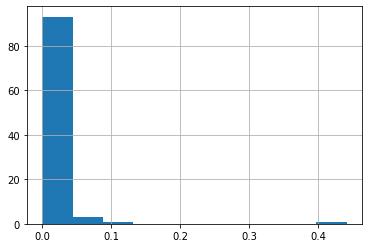

In [105]:
insurance_population['volume_per_capita'].hist();

In [106]:
insurance_population[insurance_population['volume_per_capita']>0.15]

,CUR,Currency,VAR,Variable,OWN,Ownership,IVTYP,Investment Type,ITYP,Insurance Type,...,Value,Flag Codes,Flags,Country Name,Country Code,Indicator Name,Indicator Code,year,population,volume_per_capita
19,USD,US Dollars (millions),OFI,Outstanding figures of investments by direct i...,TOT,All undertakings (=1+3),TOT,TOTAL INVESTMENTS,TOT,Total,...,273518.716,NaN,NaN,Luxembourg,LUX,"Population, total",SP.POP.TOTL,2019,620001.0,0.441159


The same analysis can now be followed to determine the volume of insurances compared to a country's wealth. 

### Insurance volume to GDP

In [120]:
world_gdp.drop('Unnamed: 65', axis=1, inplace=True)
world_population.columns

KeyError: "['Unnamed: 65'] not found in axis"

In [121]:
other_columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']
long_world_gdp=world_gdp.melt(id_vars=other_columns, var_name='year', value_name='gdp')
long_world_gdp_2019=long_world_gdp[long_world_gdp['year']=='2019']
long_world_gdp_2019.head()

,Country Name,Country Code,Indicator Name,Indicator Code,year,gdp
15694,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,2019,NaN
15695,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2019,9.778092e+11
15696,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,2019,1.929110e+10
15697,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,2019,7.920789e+11
15698,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,2019,8.941719e+10


In [122]:
insurance_gdp=pd.merge(total_insurance_per_country_2019, long_world_gdp_2019, 
                              left_on='COU', right_on='Country Code', how='left')
insurance_gdp.columns

Index(['CUR', 'Currency', 'VAR', 'Variable', 'OWN', 'Ownership', 'IVTYP',
       'Investment Type', 'ITYP', 'Insurance Type', 'DEST', 'Destination',
       'TYP', 'Insurer type', 'COU', 'Country', 'YEA', 'Year', 'Unit Code',
       'Unit', 'PowerCode Code', 'PowerCode', 'Reference Period Code',
       'Reference Period', 'Value', 'Flag Codes', 'Flags', 'Country Name',
       'Country Code', 'Indicator Name', 'Indicator Code', 'year', 'gdp'],
      dtype='object')

In [123]:
insurance_gdp['volume_gdp_ratio']=insurance_gdp['Value']/insurance_gdp['gdp']*100
insurance_gdp.head(1)

,CUR,Currency,VAR,Variable,OWN,Ownership,IVTYP,Investment Type,ITYP,Insurance Type,...,Value,Flag Codes,Flags,Country Name,Country Code,Indicator Name,Indicator Code,year,gdp,volume_gdp_ratio
0,USD,US Dollars (millions),OFI,Outstanding figures of investments by direct i...,TOT,All undertakings (=1+3),TOT,TOTAL INVESTMENTS,TOT,Total,...,148784.948,NaN,NaN,Australia,AUS,GDP (current US$),NY.GDP.MKTP.CD,2019,1.396567e+12,0.000011


In [124]:
data = dict(type = 'choropleth',
            locations = insurance_gdp['Country'],
            locationmode = 'country names',
            colorscale= 'Portland',
            text= insurance_gdp['Country'],
            z=insurance_gdp['volume_gdp_ratio'],
            colorbar = {'title':'%'})

layout = dict(
    title = 'Insurance (both life and non-life) Volume GDP ratio in USD in 2019',
    geo = dict(
        showframe = False,
        projection = {'type':'mercator'}
    )
)

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap, image_width=1200)

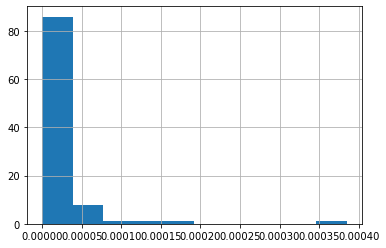

In [125]:
insurance_gdp['volume_gdp_ratio'].hist();

In [116]:
insurance_gdp[insurance_gdp['volume_gdp_ratio']>0.0003]

,CUR,Currency,VAR,Variable,OWN,Ownership,IVTYP,Investment Type,ITYP,Insurance Type,...,Value,Flag Codes,Flags,Country Name,Country Code,Indicator Name,Indicator Code,year,gdp,volume_gdp_ratio
19,USD,US Dollars (millions),OFI,Outstanding figures of investments by direct i...,TOT,All undertakings (=1+3),TOT,TOTAL INVESTMENTS,TOT,Total,...,273518.716,NaN,NaN,Luxembourg,LUX,GDP (current US$),NY.GDP.MKTP.CD,2019,7.110492e+10,0.000385


Again, Luxembourg is the outlier. Also compared to the GDP, its insurance volume is higher than in other countries. Reasons for this are not yet visible in the analysis. 
However, the volume to GDP ratio seems to be a bit more spread than the per capita ratio. 

## Deep dive into German insurances 

In the following section, I analyse more in detail the composition of German insurance volume. This refers to asset classes as well as temporal development of these. 

### Asset Classes

In [137]:
grouped_german=insurances[insurances['Country']=='Germany'].groupby(['Year', 'Investment Type', 'Destination', 'Insurance Type', 'CUR'], as_index=False).sum()

In [138]:
grouped_german.head()

,Year,Investment Type,Destination,Insurance Type,CUR,YEA,PowerCode Code,Reference Period Code,Reference Period,Value
0,2001,Bills and bonds issued by public and private s...,Total,Life,EUR,2001,6,0.0,0.0,73786.000
1,2001,Bills and bonds issued by public and private s...,Total,Life,NAT,2001,6,0.0,0.0,73786.000
2,2001,Bills and bonds issued by public and private s...,Total,Life,USD,2001,6,0.0,0.0,65027.602
3,2001,Bills and bonds issued by public and private s...,Total,Non-Life,EUR,2001,6,0.0,0.0,17119.000
4,2001,Bills and bonds issued by public and private s...,Total,Non-Life,NAT,2001,6,0.0,0.0,17119.000


In [132]:
grouped_german.index
grouped_german.columns
grouped_german['Destination'].unique()

array(['Total'], dtype=object)

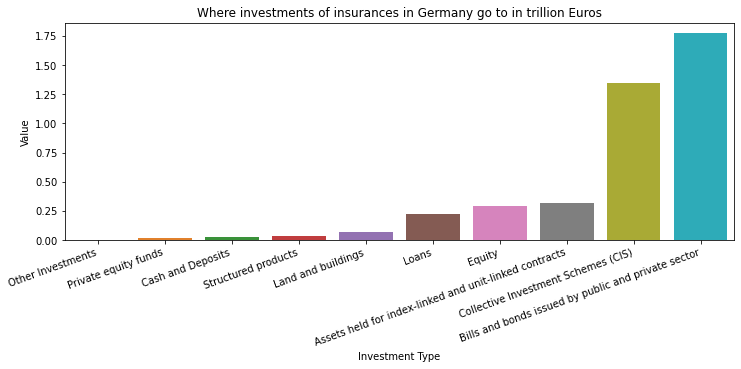

In [140]:
investment_year=grouped_german['Year']==2019
investment_type=grouped_german['Investment Type']!='TOTAL INVESTMENTS'
destination=grouped_german['Destination']=='Total'
insurance_type=grouped_german['Insurance Type']=='Total'
of_which=grouped_german['Investment Type'].str.contains("of which")
currency=grouped_german['CUR']=='EUR'
total_subset=grouped_german[investment_year & destination & investment_type & ~of_which & insurance_type & currency]

chart_data = total_subset.sort_values(['Value']).reset_index(drop=True)
chart_data['Value']=chart_data['Value'].round(0)/1000000

plt.figure(figsize=(12,4))
ax=sns.barplot(x='Investment Type', y='Value', data=chart_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
ax.set_title('Where investments of insurances in Germany go to in trillion Euros')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

The majority of assets held by German insurances in 2019 were bills and bonds as well as collective investment schemes. Those schemes are defined on OECD's website as:

"Comprise both retail and institutional funds (open-end and closed end) in which investors pool their funds to invest in a diversified portfolio of securities. It includes mutual funds, investment funds, UCITS-like funds, exchange-traded funds (ETFs), and specialised funds such as real estate funds (e.g. REITs), money market funds, debt funds. CIS funds may be listed or unlisted. Hedge funds and private equity funds should not be included in this category."

Different than for other countries, no distinction between foreign and domestic investments is available. 

In [145]:
total=grouped_german[investment_year & destination & investment_type & ~of_which & currency]
total1=total.groupby(['Insurance Type', 'Year'], as_index=False).sum()

total1[total1['Insurance Type']!='Total']

,Insurance Type,Year,YEA,PowerCode Code,Reference Period Code,Reference Period,Value
0,Life,2019,60570,180,0.0,0.0,2818015.56
1,Non-Life,2019,60570,180,0.0,0.0,1295274.45


In [146]:
total2=total.groupby(['Insurance Type', 'Year', 'Investment Type'], as_index=False).sum()

total2=total[total['Insurance Type']!='Total']
total2

,Year,Investment Type,Destination,Insurance Type,CUR,YEA,PowerCode Code,Reference Period Code,Reference Period,Value
1260,2019,Assets held for index-linked and unit-linked c...,Total,Life,EUR,6057,18,0.0,0.0,317822.22
1263,2019,Assets held for index-linked and unit-linked c...,Total,Non-Life,EUR,6057,18,0.0,0.0,109.94
1269,2019,Bills and bonds issued by public and private s...,Total,Life,EUR,6057,18,0.0,0.0,1151013.84
1272,2019,Bills and bonds issued by public and private s...,Total,Non-Life,EUR,6057,18,0.0,0.0,622730.65
1278,2019,Cash and Deposits,Total,Life,EUR,6057,18,0.0,0.0,13928.87
1281,2019,Cash and Deposits,Total,Non-Life,EUR,6057,18,0.0,0.0,17072.16
1287,2019,Collective Investment Schemes (CIS),Total,Life,EUR,6057,18,0.0,0.0,938395.98
1290,2019,Collective Investment Schemes (CIS),Total,Non-Life,EUR,6057,18,0.0,0.0,406994.69
1296,2019,Equity,Total,Life,EUR,6057,18,0.0,0.0,130116.05
1299,2019,Equity,Total,Non-Life,EUR,6057,18,0.0,0.0,166436.50


In [147]:
total2.groupby(['Insurance Type', 'Investment Type'], as_index=True).sum()['Value']

Insurance Type  Investment Type                                       
Life            Assets held for index-linked and unit-linked contracts     317822.22
                Bills and bonds issued by public and private sector       1151013.84
                Cash and Deposits                                           13928.87
                Collective Investment Schemes (CIS)                        938395.98
                Equity                                                     130116.05
                Land and buildings                                          43358.62
                Loans                                                      182703.13
                Other Investments                                            4327.45
                Private equity funds                                         8114.07
                Structured products                                         28235.33
Non-Life        Assets held for index-linked and unit-linked contracts        1

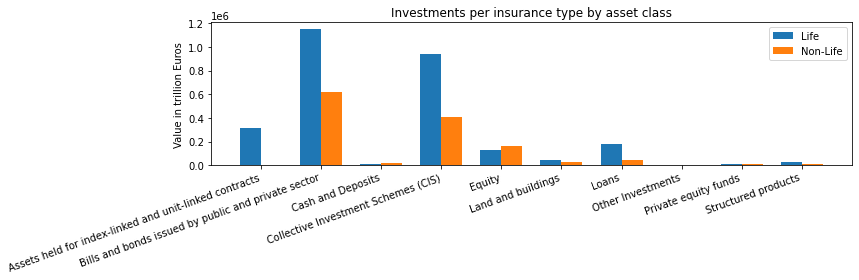

In [148]:
life_insurances = total2[total2['Insurance Type']=='Life'].groupby('Investment Type', as_index=False).sum()['Value']
non_life_insurances = total2[total2['Insurance Type']=='Non-Life'].groupby('Investment Type', as_index=False).sum()['Value']
labels=total2[total2['Insurance Type']=='Life']['Investment Type']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12,4))
rect1=ax.bar(x-width/2, life_insurances, width, label='Life')
rect2=ax.bar(x+width/2, non_life_insurances, width, label='Non-Life')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Value in trillion Euros')
ax.set_title('Investments per insurance type by asset class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")

fig.tight_layout()


### Timeline of development 

In [152]:
germany_total=insurances[(insurances['Country']=='Germany') & (insurances['Insurance Type']=='Total') & ~(insurances['Investment Type'].str.contains("of which")) & (insurances['CUR']=='EUR')]
germany_total.head()

,CUR,Currency,VAR,Variable,OWN,Ownership,IVTYP,Investment Type,ITYP,Insurance Type,...,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
5911,EUR,Euros (millions),OFI,Outstanding figures of investments by direct i...,DOM,1. Domestic undertakings,REST,Land and buildings,TOT,Total,...,2006,EUR,Euro,6,Millions,NaN,NaN,18410.771,NaN,NaN
5912,EUR,Euros (millions),OFI,Outstanding figures of investments by direct i...,DOM,1. Domestic undertakings,REST,Land and buildings,TOT,Total,...,2007,EUR,Euro,6,Millions,NaN,NaN,16018.548,NaN,NaN
5913,EUR,Euros (millions),OFI,Outstanding figures of investments by direct i...,DOM,1. Domestic undertakings,REST,Land and buildings,TOT,Total,...,2008,EUR,Euro,6,Millions,NaN,NaN,15211.000,NaN,NaN
5914,EUR,Euros (millions),OFI,Outstanding figures of investments by direct i...,DOM,1. Domestic undertakings,REST,Land and buildings,TOT,Total,...,2009,EUR,Euro,6,Millions,NaN,NaN,14401.456,NaN,NaN
5915,EUR,Euros (millions),OFI,Outstanding figures of investments by direct i...,DOM,1. Domestic undertakings,REST,Land and buildings,TOT,Total,...,2010,EUR,Euro,6,Millions,NaN,NaN,15518.183,NaN,NaN


In [153]:
germany_per_year_type=germany_total.groupby(['Investment Type', 'Year'], as_index=False).sum('Value')
germany_per_year_type.tail()

,Investment Type,Year,YEA,PowerCode Code,Reference Period Code,Reference Period,Value
126,TOTAL INVESTMENTS,2015,6045,18,0.0,0.0,3115187.281
127,TOTAL INVESTMENTS,2016,6048,18,0.0,0.0,3574394.670
128,TOTAL INVESTMENTS,2017,6051,18,0.0,0.0,3632362.210
129,TOTAL INVESTMENTS,2018,6054,18,0.0,0.0,3688576.140
130,TOTAL INVESTMENTS,2019,6057,18,0.0,0.0,4113290.010


In [167]:
germany_per_year_type_wototal=germany_per_year_type[germany_per_year_type['Investment Type']!='TOTAL INVESTMENTS']

In [168]:
# This graph turned out not to be useful 
#g=sns.FacetGrid(data=germany_per_year_type_wototal, row='Investment Type', height=9, aspect=2)
#g.map(sns.lineplot, x='Year', y='Value', data=germany_per_year_type_wototal)

In [169]:
germany_per_year_type_wototal[germany_per_year_type_wototal['Investment Type']=='Assets held for index-linked and unit-linked contracts']

,Investment Type,Year,YEA,PowerCode Code,Reference Period Code,Reference Period,Value
0,Assets held for index-linked and unit-linked c...,2016,6048,18,0.0,0.0,253226.59
1,Assets held for index-linked and unit-linked c...,2017,6051,18,0.0,0.0,277871.70
2,Assets held for index-linked and unit-linked c...,2018,6054,18,0.0,0.0,259393.44
3,Assets held for index-linked and unit-linked c...,2019,6057,18,0.0,0.0,317932.16


In [170]:
pd.to_numeric(germany_per_year_type_wototal['Value'])

0      253226.59
1      277871.70
2      259393.44
3      317932.16
4       90905.00
         ...    
107     10074.50
108      8162.78
109      9323.58
110     14870.71
111     37256.51
Name: Value, Length: 112, dtype: float64

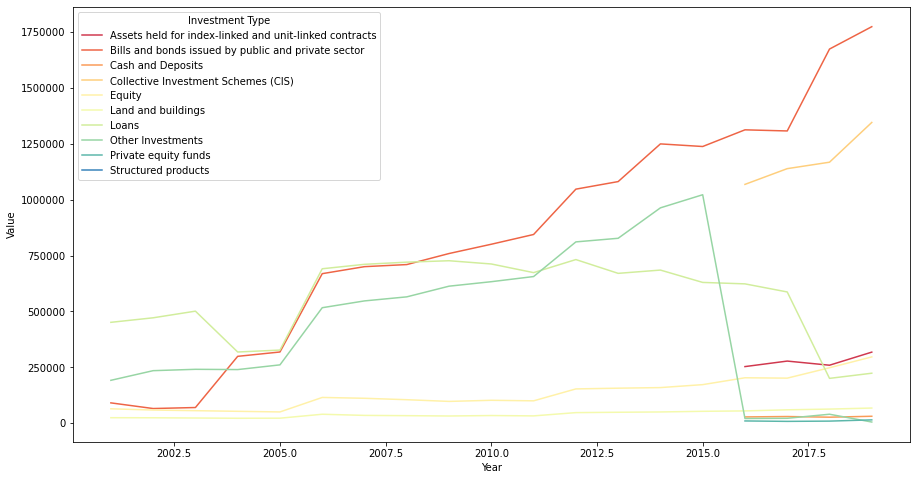

In [171]:
plt.figure(figsize = (15,8))
plt.ticklabel_format(style='plain', axis='y')
sns.lineplot(data=germany_per_year_type_wototal, x='Year', y='Value', hue='Investment Type', palette='Spectral');

Looking at the development of the importance of asset classes over time, we can see that bills and bonds only build their position only in the past few years. Shortly after the millenium, mere important than this were loans and other investments. Other investments are defined as "Investment in other assets not included in the above categories", without any further specification. 